### Iris Flower Classification 

In [1]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import numpy as np
def load_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    return df, iris.target_names

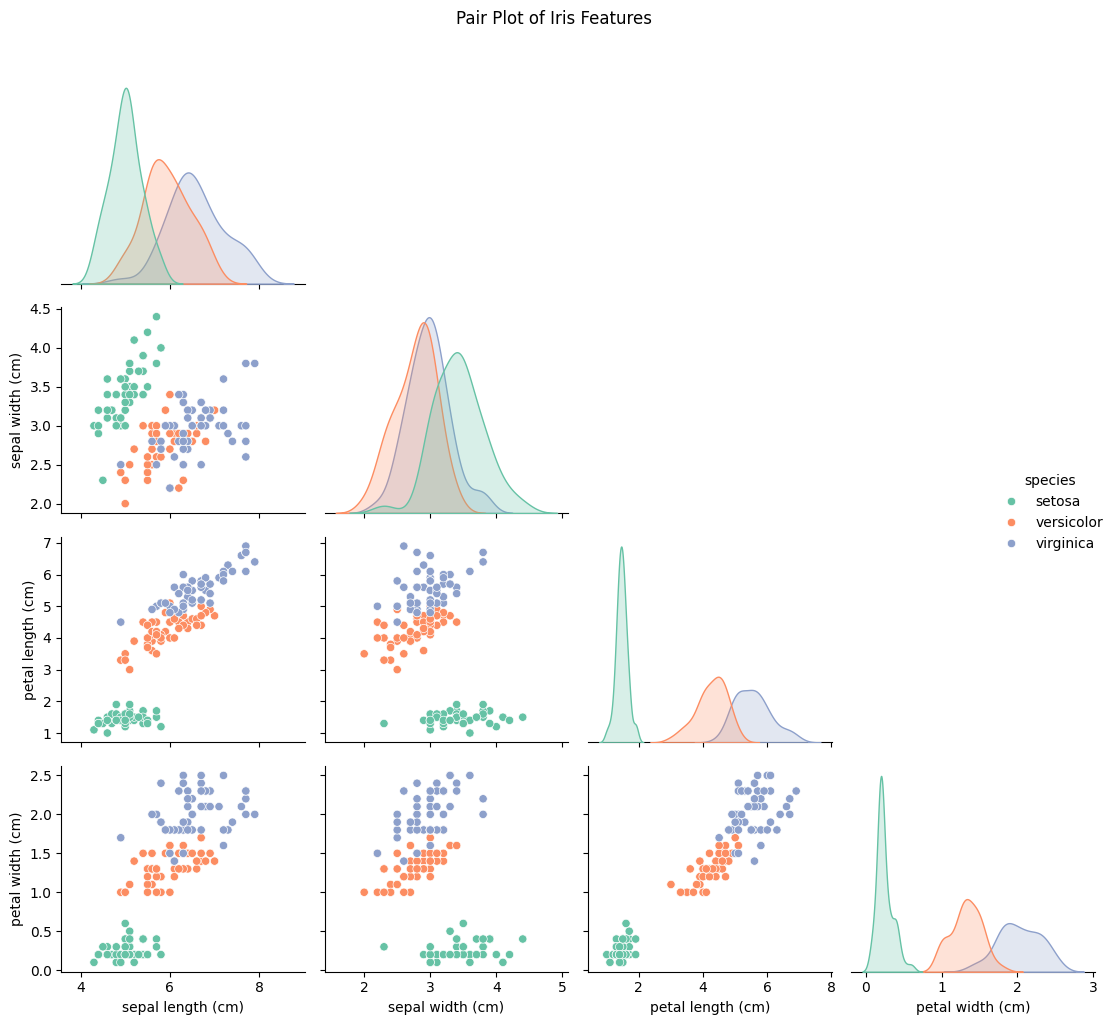

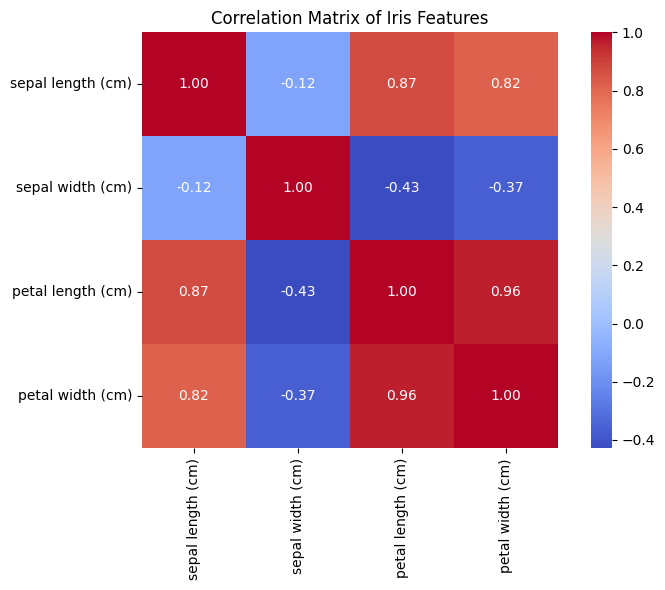

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Pair plot
sns.pairplot(df, hue='species', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
corr = df.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Iris Features")
plt.tight_layout()
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

df, target_names = load_data()
x = df.iloc[:, :-1]
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
def create_model(params, df, x_test, y_test):
    n_est = int(params[0])
    n_max = int(params[1])

    model = RandomForestClassifier(n_estimators=n_est, max_depth=n_max)
    model.fit(df.iloc[:, :-1], df['species'])

    return model

def fitness_fun(swarm_positions):
    costs = []

    for particle in swarm_positions:
        n_est = int(particle[0])
        n_max = int(particle[1])

        model = create_model([n_est, n_max], df, x_test, y_test)

        accuracy = model.score(x_test, y_test)
        costs.append(-accuracy)  

    return np.array(costs)

def pso(cost_func, dim, num_particles, max_iter=100, w=0.5, c1=2, c2=2):
    particles = np.random.uniform(1, 100, (num_particles, dim))
    velocities = np.zeros((num_particles, dim))
    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(particles)])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    for i in range(max_iter):
        r1 = np.random.uniform(0.01, 1, (num_particles, dim))
        r2 = np.random.uniform(0.01, 1, (num_particles, dim))
        velocities = (
            w * velocities +
            c1 * r1 * (best_positions - particles) +
            c2 * r2 * (swarm_best_position - particles)
        )
        particles += velocities
        particles = np.clip(particles, 1, 500)  
        
        fitness_values = np.array([cost_func(particles)])
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    return swarm_best_position, swarm_best_fitness

# Call PSO
dim = 2
num_particles = 30
solution, fitness = pso(fitness_fun, num_particles=num_particles, dim=dim)
print("solution:", solution)
print("fitness:", fitness)


solution: [99.55927692 18.30988712]
fitness: -1.0


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Suboptimal model before optimization
basic_model = RandomForestClassifier(n_estimators=1, max_depth=2)
basic_model.fit(x_train, y_train)
y_pred_basic = basic_model.predict(x_test)

print("\n--- Before Optimization ---")
print("Accuracy:", accuracy_score(y_test, y_pred_basic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_basic))
print("Classification Report:\n", classification_report(y_test, y_pred_basic))
# Optimized model after PSO
optimized_model = RandomForestClassifier(
    n_estimators=int(solution[0]), max_depth=int(solution[1])
)
optimized_model.fit(x_train, y_train)
y_pred_opt = optimized_model.predict(x_test)

print("\n--- After PSO Optimization ---")
print("Accuracy:", accuracy_score(y_test, y_pred_opt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_opt))
print("Classification Report:\n", classification_report(y_test, y_pred_opt))



--- Before Optimization ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- After PSO Optimization ---
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00 

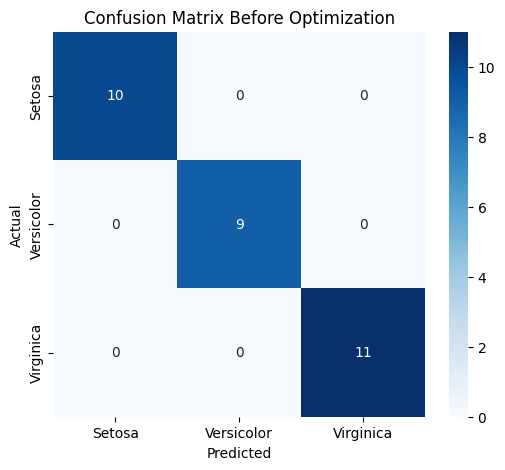

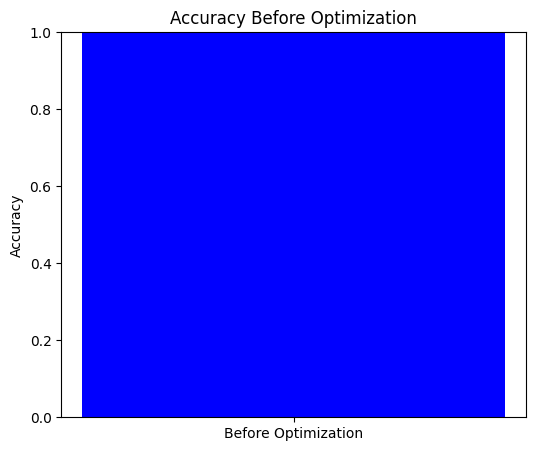

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_basic)

# Create a heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix Before Optimization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


accuracy = accuracy_score(y_test, y_pred_basic)

# Bar chart for accuracy
plt.figure(figsize=(6, 5))
plt.bar(['Before Optimization'], [accuracy], color='blue')
plt.title('Accuracy Before Optimization')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


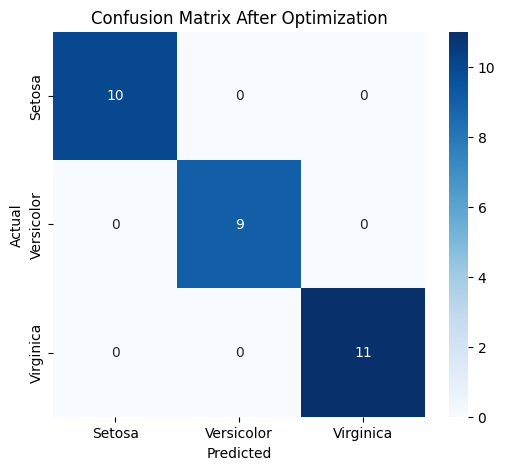

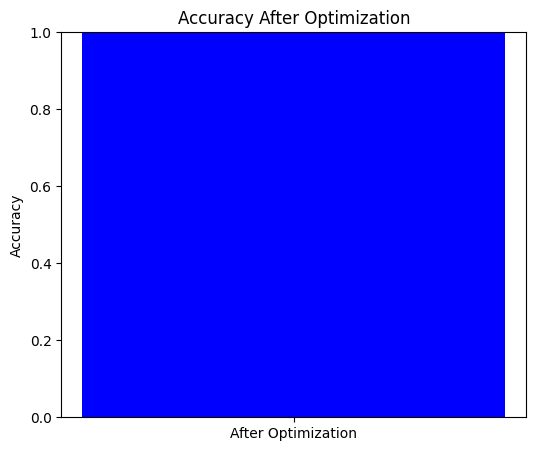

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np



# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_opt)

# Create a heatmap for confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.title('Confusion Matrix After Optimization')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


accuracy = accuracy_score(y_test, y_pred_opt)

# Bar chart for accuracy
plt.figure(figsize=(6, 5))
plt.bar(['After Optimization'], [accuracy], color='blue')
plt.title('Accuracy After Optimization')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


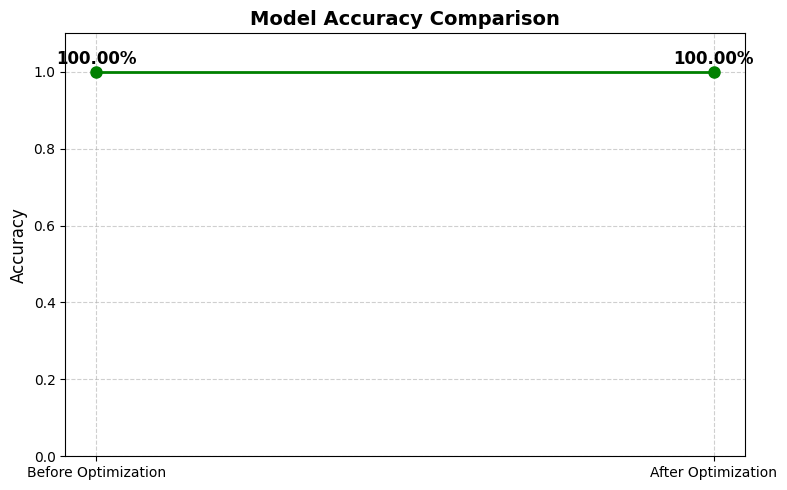

In [10]:
import matplotlib.pyplot as plt

# Accuracy values
accuracy_before = accuracy_score(y_test, y_pred_basic)
accuracy_after = accuracy_score(y_test, y_pred_opt)

# Labels and values
labels = ['Before Optimization', 'After Optimization']
accuracies = [accuracy_before, accuracy_after]

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(labels, accuracies, marker='o', linestyle='-', color='green', linewidth=2, markersize=8)

# Annotate accuracy values on each point
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.2%}', ha='center', fontsize=12, weight='bold')

# Formatting
plt.title('Model Accuracy Comparison', fontsize=14, weight='bold')
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [12]:
import plotly.graph_objects as go
from sklearn.metrics import accuracy_score

# حساب الدقة
accuracy_before = accuracy_score(y_test, y_pred_basic)
accuracy_after = accuracy_score(y_test, y_pred_opt)

# إعداد البيانات
labels = ['Before Optimization', 'After Optimization']
accuracies = [accuracy_before, accuracy_after]

# إنشاء المخطط التفاعلي
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=labels,
    y=accuracies,
    mode='lines+markers+text',
    text=[f'{a:.2%}' for a in accuracies],
    textposition='top center',
    line=dict(color='royalblue', width=4),
    marker=dict(size=12, color='royalblue'),
    name='Accuracy'
))

# تخصيص شكل الجراف
fig.update_layout(
    title='🎯 Accuracy Comparison Before & After PSO Optimization',
    xaxis_title='Model Version',
    yaxis_title='Accuracy',
    yaxis=dict(range=[0, 1.1]),
    template='plotly_white',
    font=dict(size=14),
    showlegend=False
)

fig.show()
